In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import datetime

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
# STEP 1: read in the data file and use it to build a dictionary and a list of the time data was taken


data_file = r'C:\Users\madel\Coastal Hydro Dropbox\Madeline Foster-Martinez\MRF_COESSING\wave_lab_data.csv' #change to the path of where you stored the data file
data_in = np.genfromtxt(data_file,skip_header=2,delimiter=',',dtype='str')
print(' - reading in data from %s' % data_file)


data = {}
times = []
for row in data_in:
    time = (datetime.datetime.strptime(row[0], '%d-%m-%Y %H-%M')) #first column in every row is the time information 
    station = row[1] #second column is the station ID
    parameter = row[2] #third column is the parameter measured 
    value = float(row[3]) #fourth column is the value of that parameter for this station and time 
    
    if time not in times:
        times.append(time)
    
    if parameter not in data.keys():
        data[parameter] = {}
    
    if station not in data[parameter].keys():
        data[parameter][station] = []
       
    data[parameter][station].append(value)
    
# these lines are to show the type of the things we just built:
print(type(times))
print(type(data))

 - reading in data from C:\Users\madel\Coastal Hydro Dropbox\Madeline Foster-Martinez\MRF_COESSING\wave_lab_data.csv
<class 'list'>
<class 'dict'>


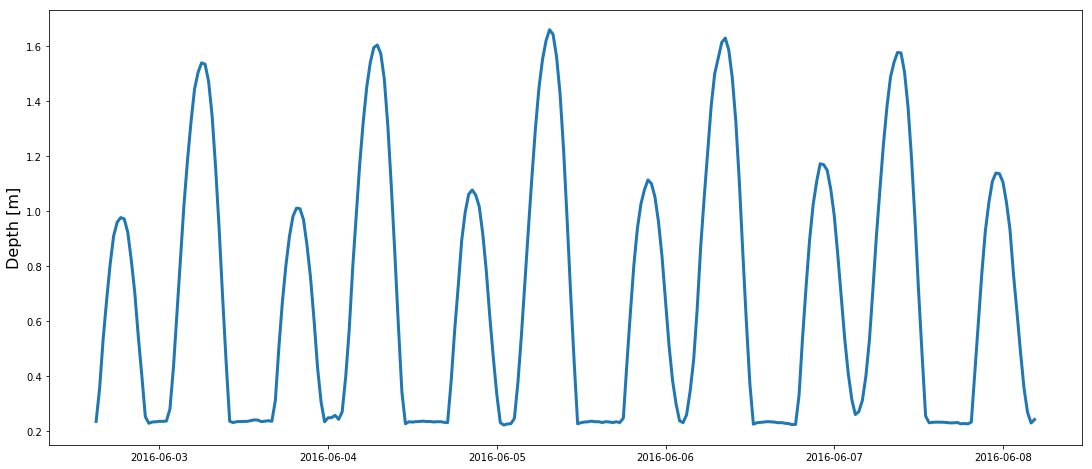

In [5]:
# Step 2: plot the depth data from station ST1 

fig = plt.figure()
plt.plot(times,data['depth']['ST1'],linewidth=3)
fig.set_size_inches(18.5, 8)
plt.ylabel('Depth [m]', fontsize=16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14



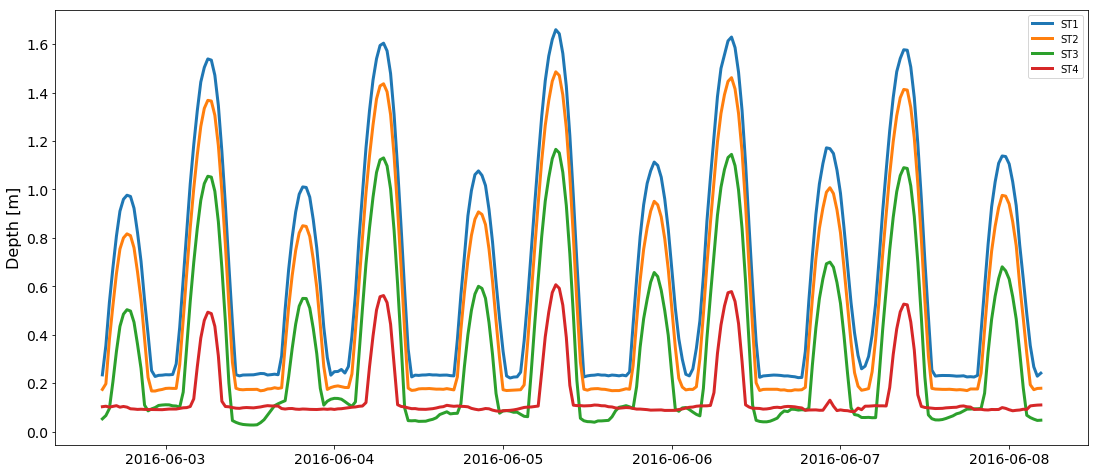

In [6]:
# Step 3: plot the water depth for all stations by looping through the station keys 

fig = plt.figure()
fig.set_size_inches(18.5, 8)
for s in data['depth'].keys():
    plt.plot(times, data['depth'][s],linewidth=3, label = s)
plt.legend()
plt.ylabel('Depth [m]', fontsize=16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

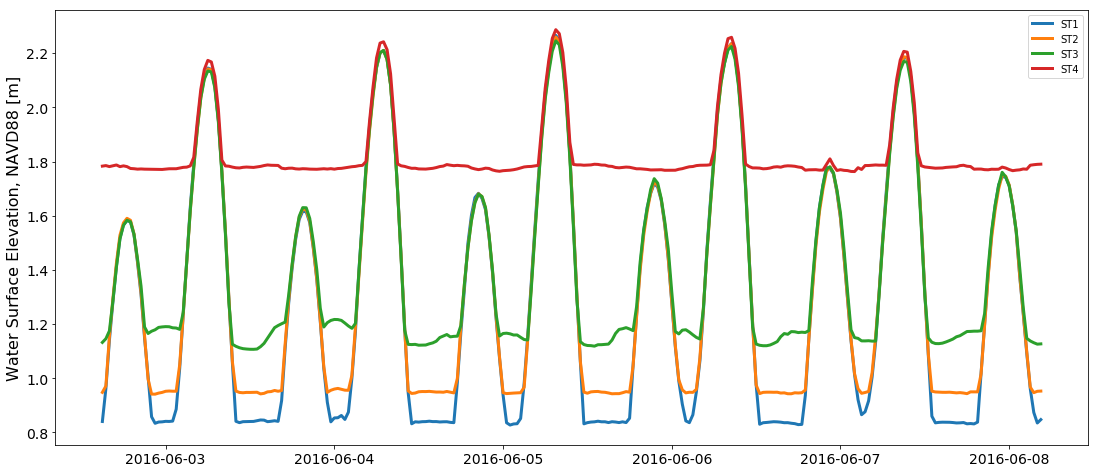

In [7]:
# Step 4: plot the water surface elevation for all stations by looping through the station keys and adding the elvation to the depth

elevation_NAVD88 = [0.6058,0.7735,1.0795,1.6800] #the measured elevation of each site in reference to the NAVD88 datum (measured with an RTK)


fig = plt.figure()
fig.set_size_inches(18.5, 8)
i = 0 
for s in data['depth'].keys():
    plt.plot(times, np.asarray(data['depth'][s])+elevation_NAVD88[i],linewidth=3, label = s)
    i += 1 #neat python shortcut. This expression is equivalent to [i = i+1]
plt.legend()
plt.ylabel('Water Surface Elevation, NAVD88 [m]', fontsize=16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

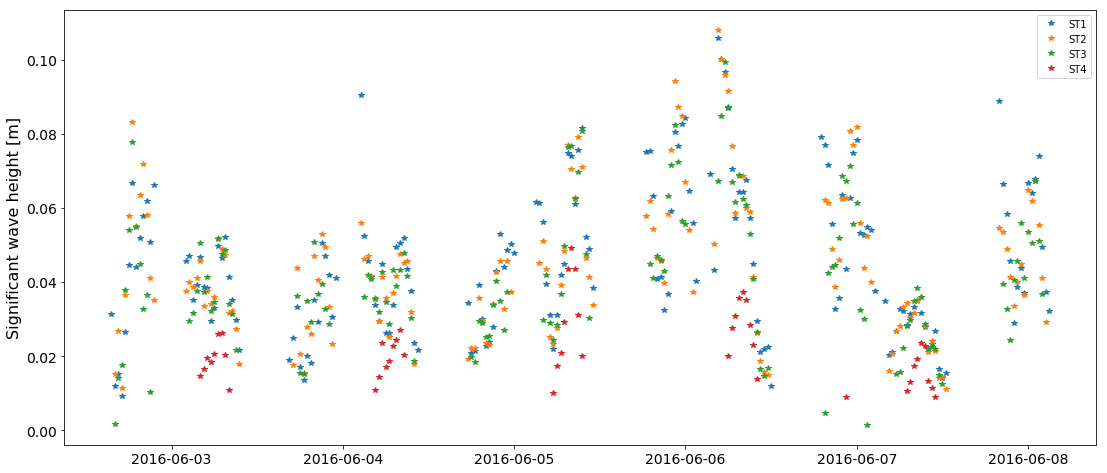

In [8]:
# Step 5: plot the significant wave height for each station

fig = plt.figure()
fig.set_size_inches(18.5, 8)
for s in data['Hsig'].keys():
    plt.plot(times,data['Hsig'][s],'*', label = s)

plt.legend()
plt.ylabel('Significant wave height [m]', fontsize=16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


C:\Users\madel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


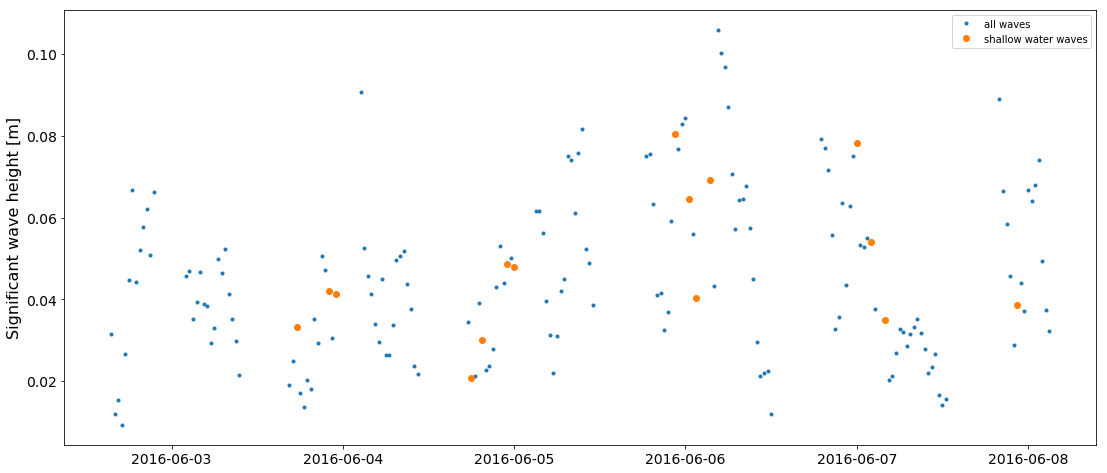

In [14]:
# Step 6: plot the significant wave height for the ST1 station, differentiating between shallow, intermediate, and deep waves

## code below shows the process for shallow waves. Try to fill in the rest for the deep water waves ## 
# for deep-water waves, the d_Ld_ratio must be greater than 1/2

fig = plt.figure()
fig.set_size_inches(18.5, 8)

d = np.asarray(data['depth']['ST1'])
T = np.asarray(data['Tp']['ST1'])
g = 9.8 #m/s2 gravitational constant
Ld = (g/(math.pi * 2))*(T*T) #deep water approximation of wavelength
d_Ld_ratio = d/Ld

H = np.asarray(data['Hsig']['ST1'])
t = np.asarray(times)

shallow = np.argwhere((d_Ld_ratio<(1/20)) & (~np.isnan(d_Ld_ratio))) #here, we are finding which waves are classified as shallow. The variable "shallow" contains the indices for these waves. 

#write a line of code to find where waves are classified as deep water waves: 

plt.plot(times,H,'.', label = 'all waves')
plt.plot(t[shallow],H[shallow],'o', label = 'shallow water waves')

# write a line of code to plot deep water waves:


plt.legend()
plt.ylabel('Significant wave height [m]', fontsize=16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

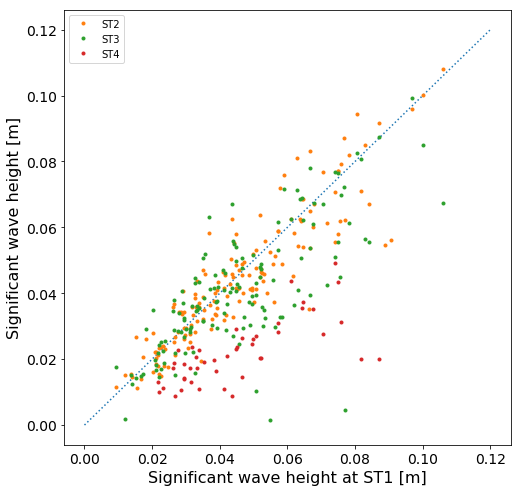

In [10]:
# Step 7: Examine the change in wave height. Plot the wave height at ST2, ST2, and ST4 against ST1. 

# if the point is below the 1:1 line, then the wave height decreased from ST1 to the station (Wave attenuation occurred)
# if the point is above the 1:1 line, then the wave height increased from ST1 to the station (Wave amplification occurred)
# if the point is on the 1:1 line, then no change in wave height occurred 

fig = plt.figure()
fig.set_size_inches(8, 8)

plt.plot([0,0.12],[0,0.12],':') #plotting a 1 to 1 line
for s in data['Hsig'].keys():
    if s == 'ST1':
        pass
    else:
        plt.plot(data['Hsig']['ST1'],data['Hsig'][s],'.', label=s)

plt.legend()
plt.ylabel('Significant wave height [m]', fontsize=16)
plt.xlabel('Significant wave height at ST1 [m]', fontsize=16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


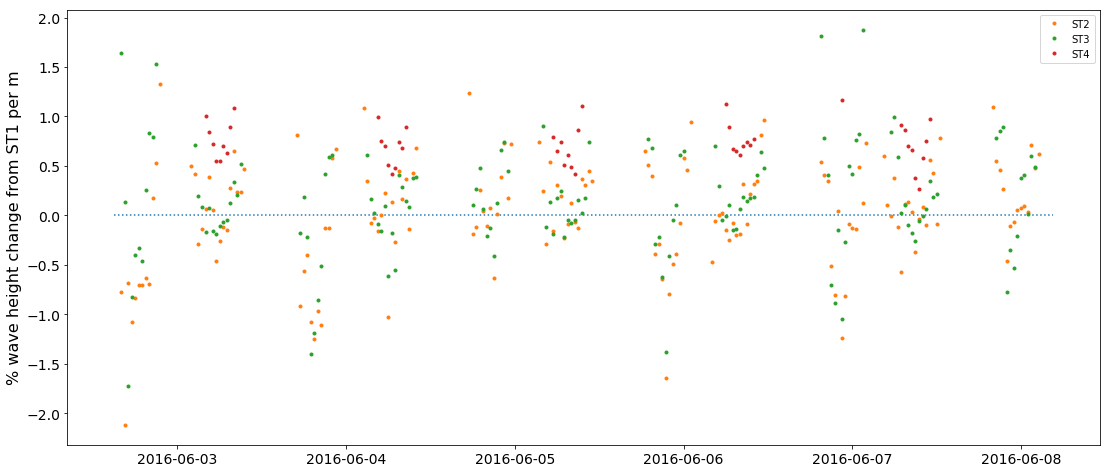

In [11]:
# Step 8: Calculate the % change per meter in wave height between the stations 

distance_from_ST1 = [0,35.27, 51.88,68.24] #distance in [m] from ST1 

fig = plt.figure()
fig.set_size_inches(18.5, 8)


plt.plot(times,[0]*len(times),':') #plotting horizontal line at 0
i = 1
H_reduction = {}
for s in data['Hsig'].keys():
    if s == 'ST1':
        pass
    else:
        H_reduction[s] = ((np.asarray(data['Hsig']['ST1'])-np.asarray(data['Hsig'][s]))/np.asarray(data['Hsig']['ST1'])*100)/distance_from_ST1[i]
        plt.plot(times, H_reduction[s],'.', label=s)
        i +=1
        
plt.legend()
plt.ylabel('% wave height change from ST1 per m', fontsize=16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

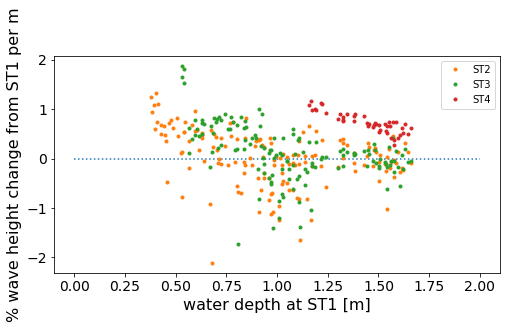

In [12]:
# Step 9: Examine how the % change caluated in step 8 varies as a function of depth at ST1

fig = plt.figure()
fig.set_size_inches(8, 4)


plt.plot([0,2],[0,0],':') #plotting horizontal line at 0
for s in data['Hsig'].keys():
    if s == 'ST1':
        pass
    else:
        plt.plot(data['depth']['ST1'], H_reduction[s],'.', label=s)

plt.legend()
plt.ylabel('% wave height change from ST1 per m', fontsize=16)
plt.xlabel('water depth at ST1 [m]', fontsize=16)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [13]:
# Step 10: Explore this dataset! Have fun!